In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pyplot
%matplotlib inline

In [ ]:
!pip install imbalanced-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
df = pd.read_csv('creditcard.csv')

FileNotFoundError: ignored

In [ ]:
df.shape

In [ ]:
df.head()

In [ ]:
df.Class.value_counts()

In [ ]:
df.loc[df.Class==1,['Amount','Class']]

In [ ]:
X = df.drop('Class',axis=1)
Y = df.Class

In [ ]:
X.head()

In [ ]:
###checking with model performance with imbalanced dataset , performing cross validation and hyper parameter tuning
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import KFold, GridSearchCV


In [ ]:
reg_model = LogisticRegression()
grid = {'C':10.0**np.arange(-2,3),'penalty':['l1','l2']}
cv = KFold(n_splits=5,shuffle=False, random_state=None)

In [ ]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,Ytrain,Ytest = train_test_split(X,Y,train_size=0.7,random_state=1)

In [ ]:
clf = GridSearchCV(reg_model,grid,cv=cv,n_jobs=-1,scoring='f1_macro')

In [ ]:
clf.fit(Xtrain,Ytrain)

In [ ]:
Ypred = clf.predict(Xtest)

In [ ]:
print('Confusion Matrix: \n', confusion_matrix(Ytest,Ypred))
print('\n Accuracy Score: \n', accuracy_score(Ytest,Ypred))
print('\n Classification Report: \n', classification_report(Ytest,Ypred))

In [ ]:
from sklearn.ensemble import RandomForestClassifier
RF_model = RandomForestClassifier()
RF_model.fit(Xtrain,Ytrain)

In [ ]:
RF_Ypred = RF_model.predict(Xtest)
print('Confusion Matrix: \n', confusion_matrix(Ytest,RF_Ypred))
print('\n Accuracy Score: \n', accuracy_score(Ytest,RF_Ypred))
print('\n Classification Report: \n', classification_report(Ytest,RF_Ypred))


###Under Sampling

In [ ]:
from imblearn.under_sampling import NearMiss


In [ ]:
from collections import Counter
ns = NearMiss(0.8)
Xtrain_ns , Ytrain_ns = ns.fit_resample(Xtrain,Ytrain)
print('Num of classes before fit {}'.format(Counter(Ytrain)))
print('Num of classes before fit {}'.format(Counter(Ytrain_ns)))

In [ ]:
from sklearn.ensemble import RandomForestClassifier
RF_US_model = RandomForestClassifier()
RF_US_model.fit(Xtrain_ns,Ytrain_ns)

In [ ]:
RF_US_Ypred = RF_US_model.predict(Xtest)
print('Confusion Matrix: \n', confusion_matrix(Ytest,RF_US_Ypred))
print('\n Accuracy Score: \n', accuracy_score(Ytest,RF_US_Ypred))
print('\n Classification Report: \n', classification_report(Ytest,RF_US_Ypred))

####Over Sampling

In [ ]:
from imblearn.over_sampling import RandomOverSampler

In [ ]:
os = RandomOverSampler(0.8)
Xtrain_os , Ytrain_os = os.fit_resample(Xtrain,Ytrain)
print('Num of classes before fit {}'.format(Counter(Ytrain)))
print('Num of classes before fit {}'.format(Counter(Ytrain_os)))

In [ ]:
from sklearn.ensemble import RandomForestClassifier
RF_OS_model = RandomForestClassifier()
RF_OS_model.fit(Xtrain_os,Ytrain_os)

In [ ]:
RF_OS_Ypred = RF_OS_model.predict(Xtest)
print('Confusion Matrix: \n', confusion_matrix(Ytest,RF_OS_Ypred))
print('\n Accuracy Score: \n', accuracy_score(Ytest,RF_OS_Ypred))
print('\n Classification Report: \n', classification_report(Ytest,RF_OS_Ypred))

####SMOTE TECHNIQUE

In [ ]:
from imblearn.combine import SMOTETomek

In [ ]:
SMT = SMOTETomek(0.75)
Xtrain_smt , Ytrain_smt = SMT.fit_resample(Xtrain,Ytrain)
print('Num of classes before fit {}'.format(Counter(Ytrain)))
print('Num of classes before fit {}'.format(Counter(Ytrain_os)))

In [ ]:
from sklearn.ensemble import RandomForestClassifier
RF_SMT_model = RandomForestClassifier()
RF_SMT_model.fit(Xtrain_smt,Ytrain_smt)

In [ ]:
RF_SMT_Ypred = RF_SMT_model.predict(Xtest)
print('Confusion Matrix: \n', confusion_matrix(Ytest,RF_SMT_Ypred))
print('\n Accuracy Score: \n', accuracy_score(Ytest,RF_SMT_Ypred))
print('\n Classification Report: \n', classification_report(Ytest,RF_SMT_Ypred))

####Outliers and impact on Machine Learning

Which Machine learning models are sensitive to outliers

1) Naive Baye's Classifier --- Not sensitive to outliers

2) SVM --- Not Sensitive to Outliers

3) Linear Legression --- Sensitive to Outliers

4) Logistic Regression --- Sensitive to Outliers

5) Decision tree regressor or Classifier --- Not Sensitive to Outliers

6) Ensemble techniques (Random Forest, XGboost, GB) - Not Sensitive to Outliers

7) KNN --- not Sensitive to Outliers

8) K Means --- Sensitive to Outliers

9) Hierarchical --- Sensitive to Outliers

10) PCA --- Sensitive to Outliers

11) Neural Networks --- Sensitive to Outliers

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
import seaborn as sns


In [ ]:
df = pd.read_csv('titanic_train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


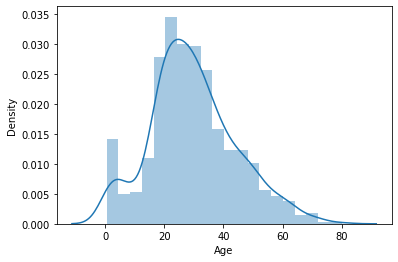

In [ ]:
sns.distplot(df['Age'].dropna())

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


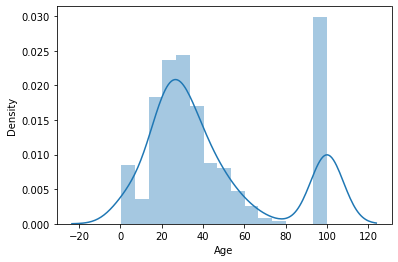

In [ ]:
sns.distplot(df['Age'].fillna(100))

Text(0, 0.5, 'No of passengers')

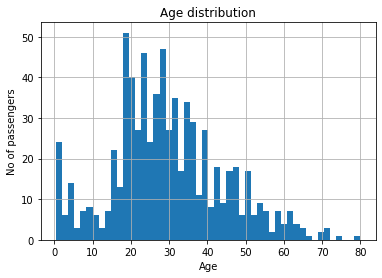

In [ ]:
figure = df.Age.hist(bins=50)
figure.set_title('Age distribution')
figure.set_xlabel('Age')
figure.set_ylabel('No of passengers')


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


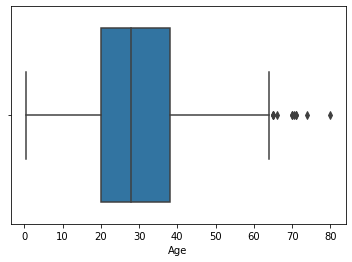

In [ ]:
figure = sns.boxplot(df.Age)


In [ ]:
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

Assuming Age follows gaussian distribution(normal distribution) we will calculate boundaries which differentiates the outliers

In [ ]:
upper_boundary = df.Age.mean() + 3*df['Age'].std()
## upper boundary = mean+3*std  ==> for normal distribution
## lower boundary = mean - 3*std ==> for normal distribution

lower_boundary = df.Age.mean() - 3*df['Age'].std()

In [ ]:
print('upper boundary is: ',upper_boundary)
print('lower boundary is: ',lower_boundary)
print('Mean of age is,',df.Age.mean())

upper boundary is:  73.27860964406094
lower boundary is:  -13.880374349943303
Mean of age is, 29.69911764705882


Text(0, 0.5, 'No of passengers')

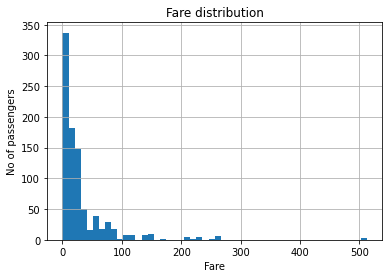

In [ ]:
## If feature is skewed
figure = df.Fare.hist(bins=50)
figure.set_title('Fare distribution')
figure.set_xlabel('Fare')
figure.set_ylabel('No of passengers')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


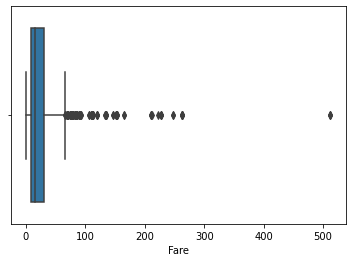

In [ ]:
sns.boxplot(df.Fare)

In [ ]:
df.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [ ]:
##compute inter quantile range to calculate boundaries
IQR = df.Fare.quantile(0.75) - df.Fare.quantile(0.25)
print('IQR is: ', IQR)

IQR is:  23.0896


In [ ]:
lower_bridge = df.Fare.quantile(0.25) - 1.5*IQR  
upper_bridge = df.Fare.quantile(0.75) + 1.5*IQR
print('lower bridge is: ', lower_bridge)
print('upper bridge is: ', upper_bridge)

lower bridge is:  -26.724
upper bridge is:  65.6344


In [ ]:
##Extrame outlier
lower_bridge = df.Fare.quantile(0.25) - 3*IQR  
upper_bridge = df.Fare.quantile(0.75) + 3*IQR
print('lower bridge is: ', lower_bridge)
print('upper bridge is: ', upper_bridge)

lower bridge is:  -61.358399999999996
upper bridge is:  100.2688


In [ ]:
data = df.copy()

In [ ]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
data.loc[data['Age']>73,'Age'] = 73


In [ ]:
data.loc[data['Fare']>100,'Fare'] = 100

Text(0, 0.5, 'No of passengers')

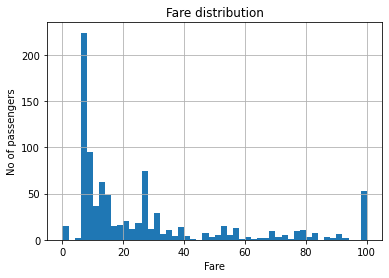

In [ ]:
figure = data.Fare.hist(bins=50)
figure.set_title('Fare distribution')
figure.set_xlabel('Fare')
figure.set_ylabel('No of passengers')

Text(0, 0.5, 'No of passengers')

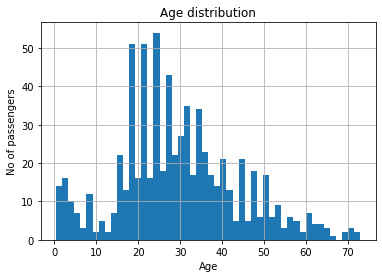

In [ ]:
figure = data.Age.hist(bins=50)
figure.set_title('Age distribution')
figure.set_xlabel('Age')
figure.set_ylabel('No of passengers')

In [ ]:
data.Age.fillna(0,inplace=True)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [ ]:
X = data[['Age','Fare']]
Y= data['Survived']

In [ ]:
xtrain,xtest,ytrain,ytest = train_test_split(X,Y,train_size=0.7,random_state=2)


In [ ]:
model = LogisticRegression()

In [ ]:
model.fit(xtrain,ytrain)

LogisticRegression()

In [ ]:
Ypredict = model.predict(xtest)

In [ ]:
Ypred1 = model.predict_proba(xtest)

In [ ]:
Ypred1

array([[0.66172802, 0.33827198],
       [0.72374101, 0.27625899],
       [0.41492597, 0.58507403],
       [0.46992217, 0.53007783],
       [0.71925704, 0.28074296],
       [0.73564232, 0.26435768],
       [0.68569785, 0.31430215],
       [0.73242127, 0.26757873],
       [0.27004668, 0.72995332],
       [0.6388761 , 0.3611239 ],
       [0.65329455, 0.34670545],
       [0.2981327 , 0.7018673 ],
       [0.72957224, 0.27042776],
       [0.42628286, 0.57371714],
       [0.42628286, 0.57371714],
       [0.72212762, 0.27787238],
       [0.65997041, 0.34002959],
       [0.79035309, 0.20964691],
       [0.68892585, 0.31107415],
       [0.77687643, 0.22312357],
       [0.23215411, 0.76784589],
       [0.62189547, 0.37810453],
       [0.66817723, 0.33182277],
       [0.71540411, 0.28459589],
       [0.7272556 , 0.2727444 ],
       [0.68248105, 0.31751895],
       [0.74818356, 0.25181644],
       [0.50383634, 0.49616366],
       [0.72581391, 0.27418609],
       [0.7374394 , 0.2625606 ],
       [0.

In [ ]:
from sklearn.metrics import accuracy_score, roc_auc_score
print('Accuracy score {}'.format(accuracy_score(ytest,Ypredict)))
print('roc_auc score: {}'.format(roc_auc_score(ytest,Ypred1[:,1])))

Accuracy score 0.6902985074626866
roc_auc score: 0.7188368055555555


In [ ]:
from sklearn.ensemble import RandomForestClassifier
RF_model = RandomForestClassifier()
RF_model.fit(xtrain,ytrain)
Ypredict = RF_model.predict(xtest)
Ypred1 = RF_model.predict_proba(xtest)
print('Accuracy score {}'.format(accuracy_score(ytest,Ypredict)))
print('roc_auc score: {}'.format(roc_auc_score(ytest,Ypred1[:,1])))

Accuracy score 0.6753731343283582
roc_auc score: 0.7234953703703704
